In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.font_manager as fm
%matplotlib inline

In [2]:
school_shooting = pd.read_csv('../../data/school_shooting_data.csv')

In [3]:
school_shooting['DateTime'] = pd.to_datetime(school_shooting['date'], format='%m/%d/%Y')
# school_shooting = school_shooting[(school_shooting['DateTime'].dt.year > 1999) & (school_shooting['DateTime'].dt.year < 2023)]

In [4]:
school_shooting['Year'] = school_shooting['DateTime'].dt.year

school_shooting_by_year = school_shooting.loc[:, ['Year']].value_counts().reset_index()

In [5]:
import requests
from tempfile import NamedTemporaryFile
font_url = 'https://github.com/google/fonts/blob/main/ofl/rubik/Rubik%5Bwght%5D.ttf' + '?raw=true'

response = requests.get(font_url)
with NamedTemporaryFile(delete=False, suffix='.ttf') as f:
    f.write(response.content)
    
    fm.fontManager.addfont(f.name)
    prop = fm.FontProperties(fname=f.name)
    print(f"Added new font to matplotlib with name {prop.get_name()} of {prop.get_family()}")

Added new font to matplotlib with name Rubik of ['sans-serif']


In [6]:
color_dark = '#000000'
color_light = '#FFFFFF'
color_dark_accent = '#14213D'
color_light_accent = '#E5E5E5'
color_highlight = '#FCA311'

mpl_runtime_config_context = {
    'axes.prop_cycle': f"cycler('color', ['{color_highlight}', '{color_dark_accent}',])",
    'font.family': 'Rubik',
    }

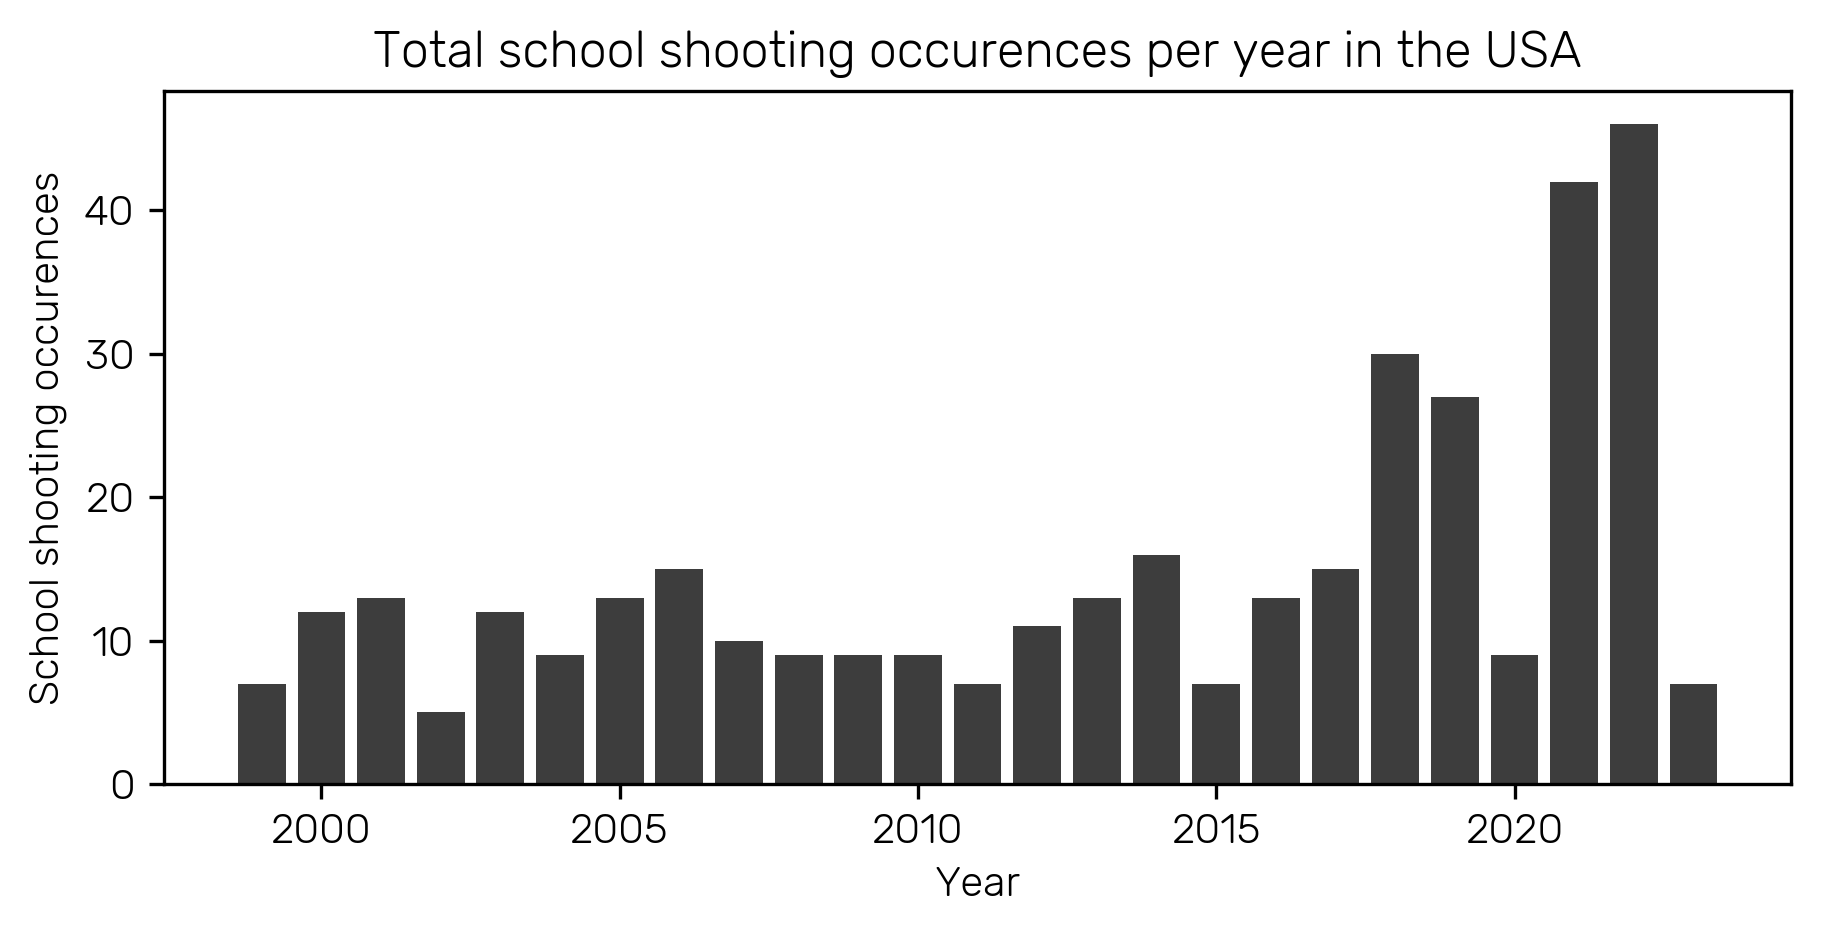

In [7]:
with plt.rc_context(mpl_runtime_config_context):
    fig = plt.figure(figsize=(7, 3), dpi=300)
    plt.title("Total school shooting occurences per year in the USA")
    plt.xlabel("Year")
    plt.ylabel("School shooting occurences")
    plt.bar(school_shooting_by_year['Year'], school_shooting_by_year['count'], color='#3d3d3d')


In [9]:
fig.savefig('../docs/assets/imgs/total_shootings.png', bbox_inches="tight")